In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv


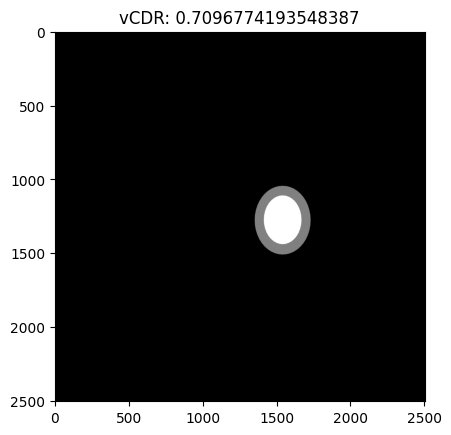

In [53]:
def calculate_vertical_diameter(image: np.ndarray, label: int | list[int]) -> int:
    image = np.array(image)
    label = np.array(label) if isinstance(label, (list, np.ndarray)) else np.array([label])

    object_mask = np.isin(image, label)
    if not np.any(object_mask):
        return 0

    object_row_indices = np.where(np.any(object_mask, axis=1))[0]

    if object_row_indices.size == 0:
        return 0
    return object_row_indices[-1] - object_row_indices[0] + 1


def calculate_vCDR(mask: np.ndarray, disc_label: int = 1, cup_label: int = 2) -> float:
    disc_diameter = calculate_vertical_diameter(mask, [disc_label])
    cup_diameter = calculate_vertical_diameter(mask, [cup_label])
    return cup_diameter / disc_diameter



mask_path = '../data/ORIGA/TrainMasks/001.png'
mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
vcdr = calculate_vCDR(mask)

plt.imshow(mask, cmap='gray')
plt.title(f'vCDR: {vcdr}')
plt.show()